<a href="https://colab.research.google.com/github/serim53/opencv_practice/blob/master/OpenCV_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%B3%80%ED%98%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## OpenCV 이미지 변형
[강의 노트](https://github.com/ndb796/Python-Data-Analysis-and-Image-Processing-Tutorial/blob/master/08.%20OpenCV%20%EC%9D%B4%EB%AF%B8%EC%A7%80%20%EB%B3%80%ED%98%95/Python%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D%EA%B3%BC%20%EC%9D%B4%EB%AF%B8%EC%A7%80%20%EC%B2%98%EB%A6%AC%20-%20OpenCV%20%EC%9D%B4%EB%AF%B8%EC%A7%80%20%EB%B3%80%ED%98%95.pdf)

cv2.resize(image, dsize, fx, fy, interpolation): 이미지의 크기를 조절합니다.

- dsize: Manual Size
- fx: 가로 비율
- fy: 세로 비율
- interpolation: 보간법

1) INTER_CUBIC: 사이즈를 크게 할 때 주로 사용합니다.

2) INTER_AREA: 사이즈를 작게 할 때 주로 사용합니다.

보간법은 사이즈가 변할 때 픽셀 사이의 값을 조절하는 방법을 의미합니다.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving dog.jpg to dog.jpg


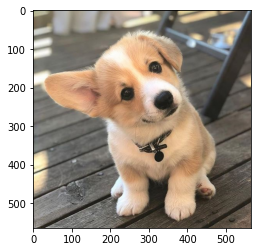

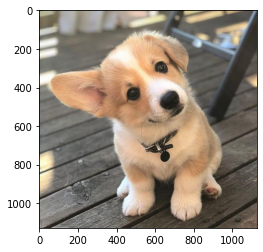

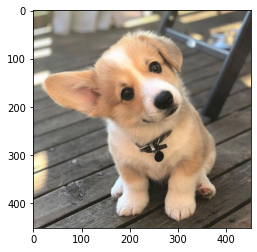

In [3]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('dog.jpg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # matplotlib는 RGB를 따름
plt.show()

expand = cv2.resize(image, None, fx=2.0, fy=2.0, interpolation=cv2.INTER_CUBIC) # 세로, 가로로 2배씩 크게하는 것
plt.imshow(cv2.cvtColor(expand, cv2.COLOR_BGR2RGB))
plt.show()

shrink = cv2.resize(image, None, fx=0.8, fy=0.8, interpolation=cv2.INTER_AREA)  # 세로, 가로로 0.8배씩 작게하는 것
plt.imshow(cv2.cvtColor(shrink, cv2.COLOR_BGR2RGB))
plt.show()

cv2.warpAffine(image, M, dsize): 이미지의 위치를 변경합니다.

- M: 변환 행렬
- dsize: Manual Size

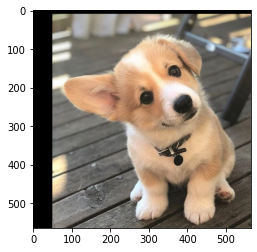

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('dog.jpg')

# 행과 열 정보만 저장합니다.
height, width = image.shape[:2]

M = np.float32([[1, 0, 50], [0, 1, 10]])  # 변환행렬의 개념을 이용. 결국 x좌표 50만큼, y좌표 10만큼 이동하는 것. [[1, 0, 이동할 x값], [0, 1, 이동할 y값]]
dst = cv2.warpAffine(image, M, (width, height))

plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

cv2.getRotationMatrix2D(center, angle, scale): 이미지 회전을 위한 변환 행렬을 생성합니다.

* center: 회전 중심
* angle: 회전 각도
* scale: Scale Factor

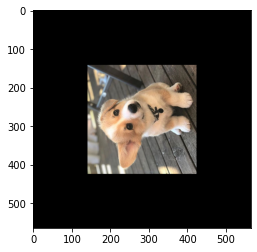

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('dog.jpg')

# 행과 열 정보만 저장합니다.
height, width = image.shape[:2]

M = cv2.getRotationMatrix2D((width / 2, height / 2), 90, 0.5) # 회전 중심각을 사진의 정중앙으로, 회전각도는 90도(반시계방향), scale을 0.5로 설정하면 크기가 반이 됨.
dst = cv2.warpAffine(image, M, (width, height))

plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()